<a href="https://colab.research.google.com/github/am21s088/ML/blob/main/Covid19_Time_Series_Visualization_nit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid19_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
covid19_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid19_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [4]:
covid19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
covid19_confirmed.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [6]:
# Rename columns
covid19_confirmed.rename({'Province/State':'State','Country/Region':'Country'}, axis = 1, inplace = True)
covid19_deaths.rename({'Province/State':'State','Country/Region':'Country'}, axis = 1, inplace = True)
covid19_recovered.rename({'Province/State':'State','Country/Region':'Country'}, axis = 1, inplace = True)

In [7]:
covid_country = covid19_confirmed.drop(['State','Lat','Long'], axis = 1)


In [8]:
covid_country.groupby(['Country']).sum() # to perform aggregate operation like sum of all the values together for every country


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [9]:
covid_country.head(15)


,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
5,Antarctica,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,Argentina,0,0,0,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
8,Armenia,0,0,0,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308
9,Australia,0,0,0,0,0,0,0,0,0,...,232018,232018,232619,232619,232619,232619,232619,232619,232619,232974


In [10]:
covid_country = covid_country.groupby(['Country']).sum()

In [11]:
covid_country.sort_values(by = covid_country.columns[-1], ascending = False).head(10) # Finally, it extracts the top 10 rows, which would correspond to the 10 countries with the highest values for that metric.


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,0,0,0,0,0,0,0,1,1,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
France,0,0,2,3,3,3,4,5,5,5,...,39827175,39831700,39835896,39839090,39839090,39839090,39847236,39854299,39860410,39866718
Germany,0,0,0,0,0,1,4,4,4,5,...,38168908,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060
Brazil,0,0,0,0,0,0,0,0,0,0,...,37052936,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053
Japan,2,2,2,2,4,4,7,7,11,15,...,33227230,33241180,33252686,33263208,33273639,33282370,33286633,33298799,33310604,33320438
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,30526012,30533573,30543981,30555102,30555102,30569215,30581499,30594297,30605187,30615522
Italy,0,0,0,0,0,0,0,0,0,2,...,25576852,25576852,25576852,25603510,25603510,25603510,25603510,25603510,25603510,25603510
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,24603373,24603450,24629830,24629840,24629840,24629840,24629840,24629846,24629922,24658705


<Axes: >

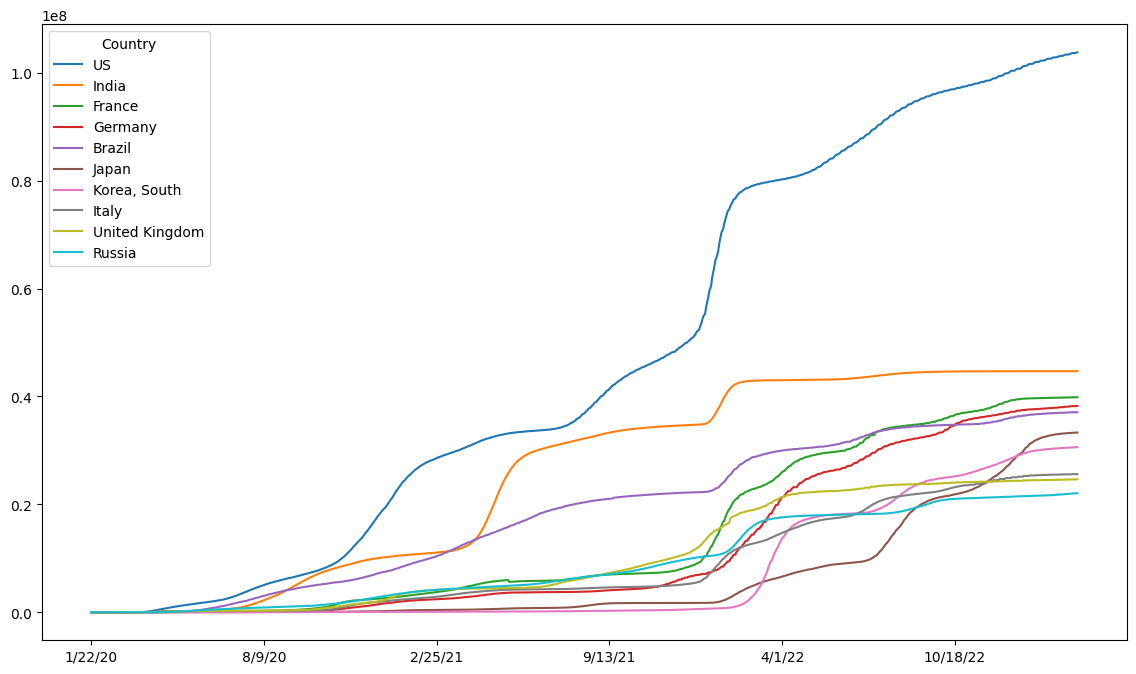

In [12]:
covid_country.sort_values(by = covid_country.columns[-1], ascending = False).head(10).transpose().plot(figsize = (14,8))


##### Daily Confirmed Cases in India


In [13]:
covid_country.loc['India'].diff()

1/22/20      NaN
1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      0.0
           ...  
3/5/23     281.0
3/6/23     266.0
3/7/23     326.0
3/8/23     379.0
3/9/23     440.0
Name: India, Length: 1143, dtype: float64

<Axes: title={'center': 'Daily Confirmed Cases in India'}>

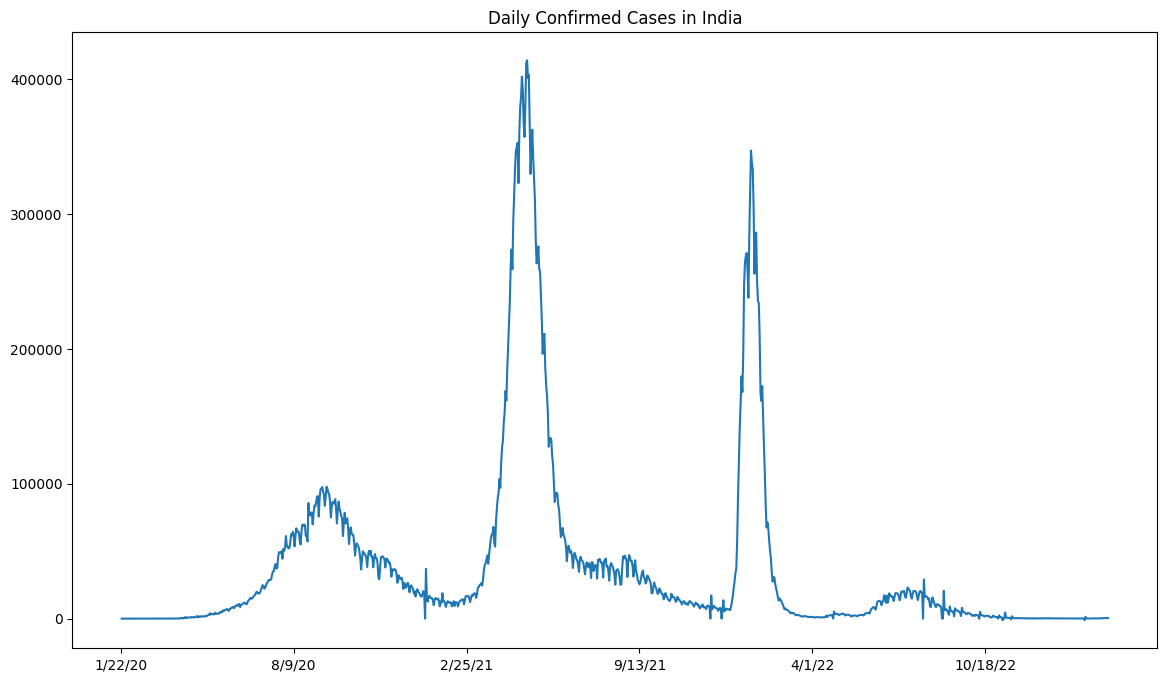

In [14]:
covid_country.loc['India'].diff().plot(figsize = (14,8), title = "Daily Confirmed Cases in India")


<Axes: title={'center': 'Daily Confirmed Cases in India,France and US'}>

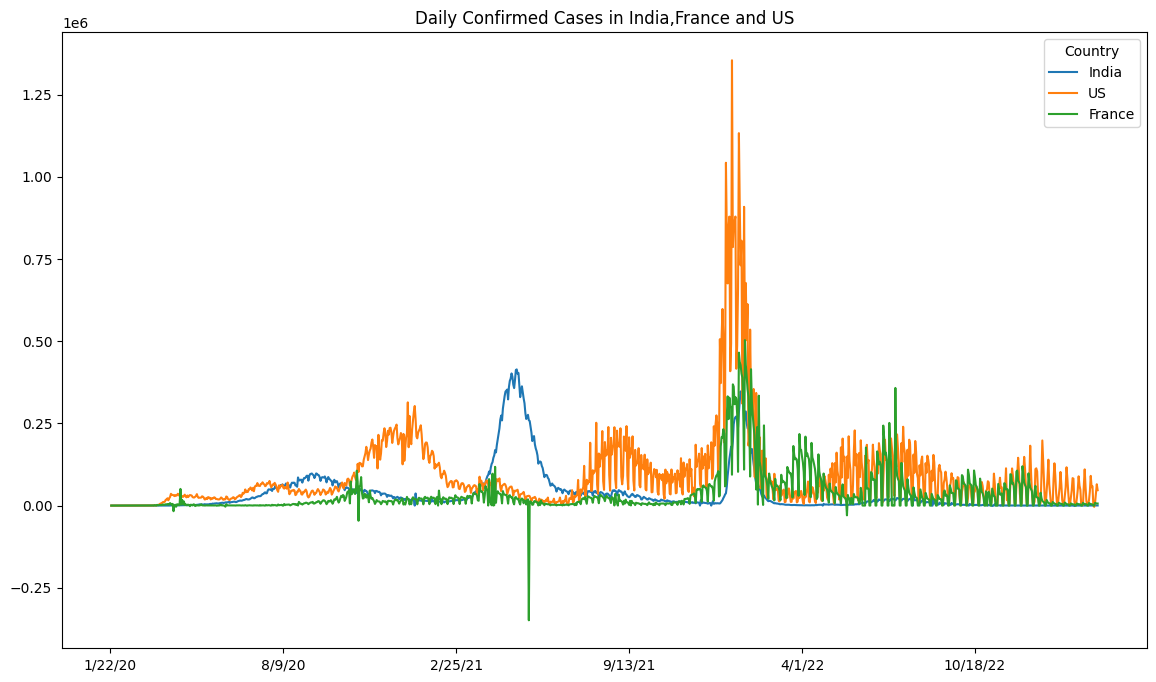

In [15]:
covid_country.loc[['India','US','France']].transpose().diff().plot(figsize = (14,8), title = "Daily Confirmed Cases in India,France and US")


In [16]:
covid_country.loc[['India','US']]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,1,1,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
US,1,1,2,2,5,5,5,6,6,8,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


In [17]:
country_deaths = covid19_deaths.drop(['State','Lat','Long'], axis = 1)
country_deaths = country_deaths.groupby(['Country']).sum()
country_deaths.sort_values(by = country_deaths.columns[-1], ascending = False).head(10)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,1119917,1120897,1121658,1122165,1122172,1122134,1122181,1122516,1123246,1123836
Brazil,0,0,0,0,0,0,0,0,0,0,...,699087,699197,699197,699276,699276,699276,699276,699276,699276,699276
India,0,0,0,0,0,0,0,0,0,0,...,530772,530772,530772,530775,530775,530775,530775,530775,530776,530779
Russia,0,0,0,0,0,0,0,0,0,0,...,388126,388163,388201,388240,388278,388320,388355,388396,388440,388478
Mexico,0,0,0,0,0,0,0,0,0,0,...,332988,333038,333038,333038,333096,333100,333100,333136,333170,333188
United Kingdom,0,0,0,0,0,0,0,0,1,1,...,220721,220721,220721,220721,220721,220721,220721,220721,220721,220721
Peru,0,0,0,0,0,0,0,0,0,0,...,219439,219448,219478,219485,219493,219493,219513,219513,219539,219539
Italy,0,0,0,0,0,0,0,0,0,0,...,188094,188094,188094,188322,188322,188322,188322,188322,188322,188322
Germany,0,0,0,0,0,0,0,0,0,0,...,168086,168175,168296,168397,168397,168397,168397,168709,168808,168935


Try to create the plot like earlier

<ipython-input-18-706366f24010>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: >

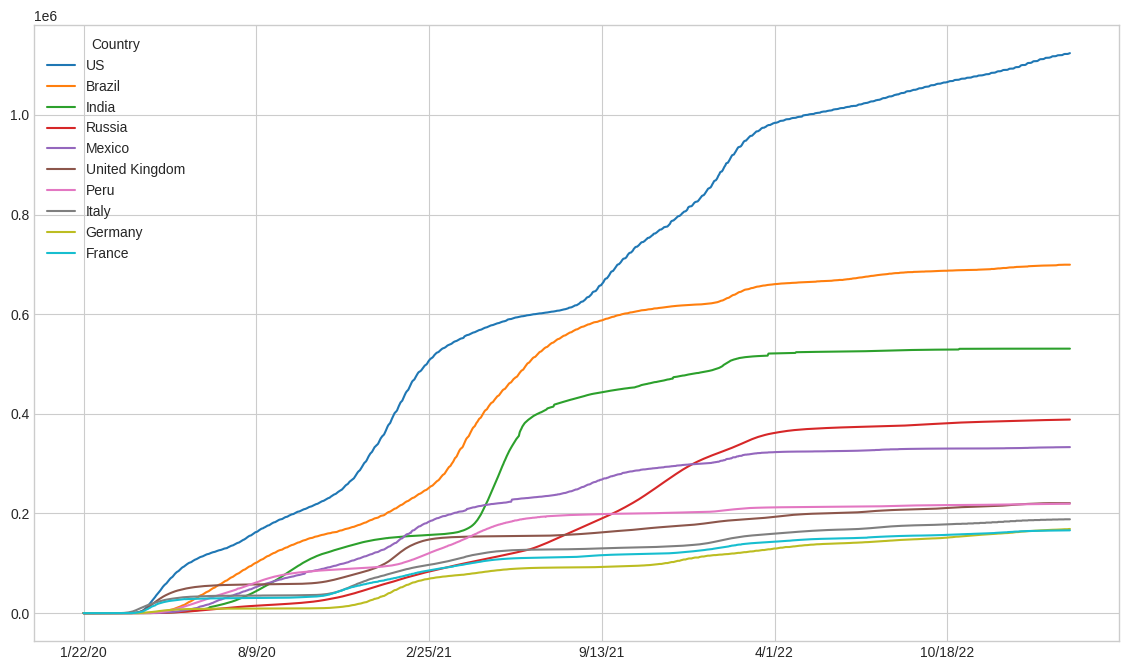

In [18]:
plt.style.use('seaborn-whitegrid')
country_deaths.sort_values(by = country_deaths.columns[-1], ascending = False).head(10).transpose().plot(figsize = (14,8))

#### Plotting Covid cases on World Map


In [19]:
covid19_confirmed[covid19_confirmed['Lat'].isnull() == True] # missing data


,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
53,Repatriated Travellers,Canada,NaN,NaN,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
89,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,1521816,1521816,1521816,1521816,1521816,1521816,1521816,1521816,1521816,1521816


In [20]:
covid19_confirmed.drop([53,89], inplace = True) # drop the rows


In [21]:
# Folium is used for plotting world map
import folium

In [22]:
world_map = folium.Map()
world_map

In [23]:
world_map = folium.Map(location = [10,0], zoom_start = 2, max_zoom = 8, min_zoom = 1, tiles='CartoDB dark_matter')
for i in range(0, len(covid19_confirmed)):
    folium.Circle(location = [covid19_confirmed.iloc[i]['Lat'], covid19_confirmed.iloc[i]['Long']],
                  fill= True, color = 'red').add_to(world_map)
world_map

In [24]:
world_map = folium.Map(location = [10,0], zoom_start = 2, max_zoom = 8, min_zoom = 1, tiles='CartoDB dark_matter')
for i in range(0, len(covid19_confirmed)):
    folium.Circle(location = [covid19_confirmed.iloc[i]['Lat'], covid19_confirmed.iloc[i]['Long']],
                  radius = (int((np.log(covid19_confirmed.iloc[i, -1] + 1.00001))) + 0.2)*11000,
                  tooltip = "<h4 style='text-align:center;font-weight: bold'>"+ covid19_confirmed.iloc[i]['Country']+"</h4>"+
                  "<h6><b>State:</b> "+ str(covid19_confirmed.iloc[i]['State']) +"</h6>" +
                  "<h6><b>Cases:</b> "+ str(covid19_confirmed.iloc[i,-1]) +"</h6>" +
                  "<h6><b>Deaths:</b> "+ str(covid19_deaths.iloc[i,-1]) +"</h6>" ,
                  fill= True, color = 'red').add_to(world_map)
world_map


snipper.io/s/-NWIHA4ztHcAOQM_vHJJ